In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(
    data = cancer['data'], columns = cancer['feature_names']
)

In [6]:
df['target'] = cancer['target']

In [7]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
X = cancer.data
y = cancer.target

In [9]:
pca = PCA(n_components=3)
tsne = TSNE(n_components = 3)

In [10]:
pca_X = pca.fit_transform(X)
tsne_X = tsne.fit_transform(X)

In [11]:
df = pd.DataFrame(data = pca_X, columns = ['pca1', 'pca2', 'pca3'])
df['target'] = y
df2 = pd.DataFrame(data = tsne_X, columns = ['tsne1', 'tsne2', 'tsne3'])
df2['target'] = y

In [12]:
df.head(), df2.head()

(          pca1        pca2       pca3  target
 0  1160.142574 -293.917544  48.578398       0
 1  1269.122443   15.630182 -35.394534       0
 2   995.793889   39.156743  -1.709753       0
 3  -407.180803  -67.380320   8.672848       0
 4   930.341180  189.340742   1.374801       0,
        tsne1     tsne2     tsne3  target
 0  17.113380 -8.524390  3.501240       0
 1  17.143654 -7.025170  4.725586       0
 2  15.288694 -5.933012  2.866445       0
 3  -4.536631 -4.325920  2.730060       0
 4  14.880438 -4.346715  2.881985       0)

In [21]:
def plot_3d(X, y, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, marker='o')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(title)

    # 범례 추가
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

    plt.show()

#### 0이면 양성 1이면 음성


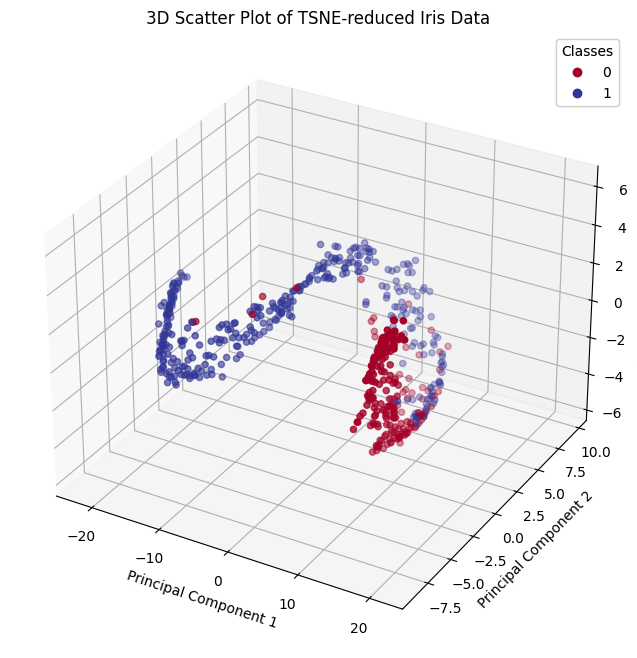

In [24]:
plot_3d(tsne_X, y, '3D Scatter Plot of TSNE-reduced Iris Data')

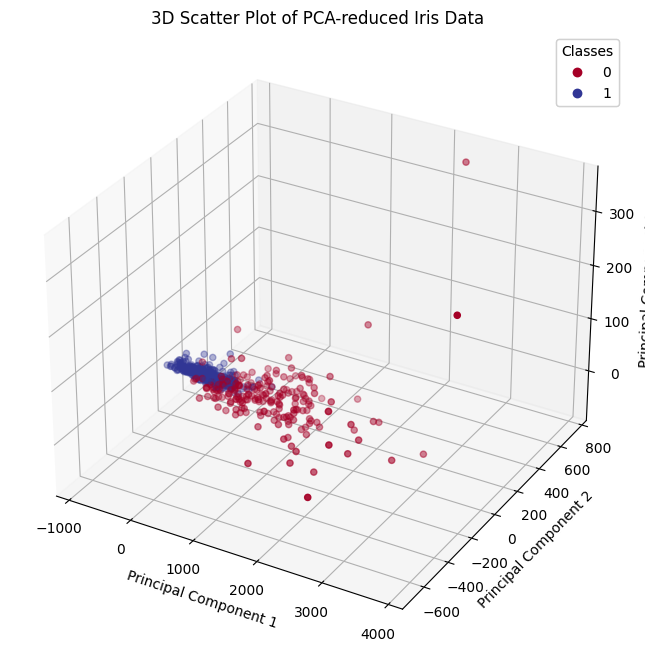

In [23]:
plot_3d(pca_X, y, '3D Scatter Plot of PCA-reduced Iris Data')

In [25]:
train_X, test_X, train_y, test_y = train_test_split(tsne_X, y, test_size = 0.2)

In [26]:
svm = SVC()
svm.fit(train_X, train_y)

SVC()

In [27]:
y_pred = svm.predict(test_X)

In [34]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
fpr, tpr, _ = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(test_y, y_pred)

In [36]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(test_y, y_pred))

Accuracy: 0.9210526315789473
Precision: 0.9315068493150684
Recall: 0.9444444444444444
F1 Score: 0.9379310344827586
AUC: 0.9126984126984126
Confusion Matrix:
 [[37  5]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



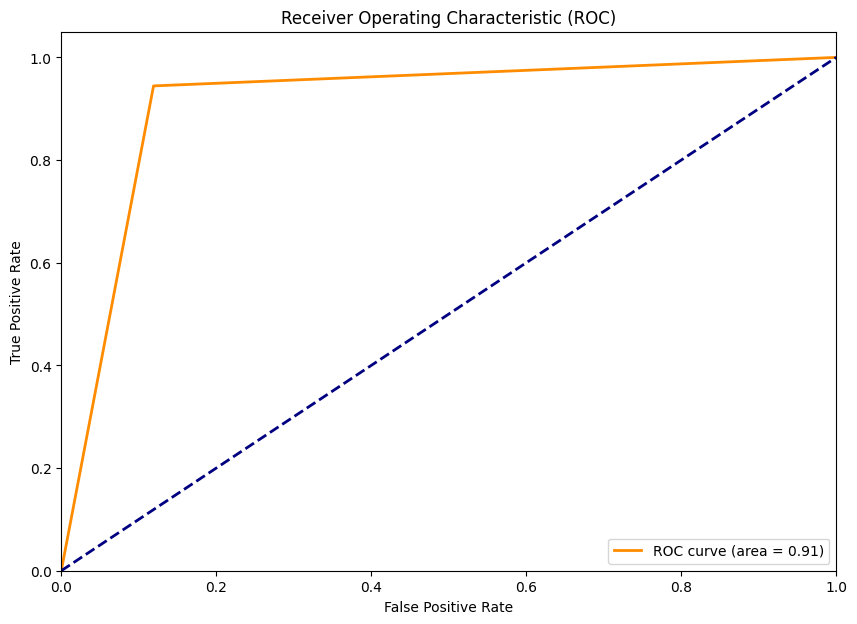

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()